<a href="https://colab.research.google.com/github/zenpp/Data-Science-Mini-Project/blob/master/NY%20Airbnb%20Open%20Data/EDA_NY_Airbnb_Open_Data_Self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis of New York City Airbnb Open data

Data source : https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data <br>

This note book will show you an analysis of New York city Airbnb open data 

Author : Patchara Pattiyathanee


In [0]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Mounted Google Drive directory to this notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load data into Data Frame



In [0]:
file_path = '/content/drive/My Drive/Shareable /Data Science Projects/NY Airbnb Open Data'
df = pd.read_csv(file_path + '/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


understand the data 
* data shape
* data type
* null value





In [0]:
print(df.info())
print('=========================================================')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

Check some of record that have null value  

In [0]:
check_null = df[df['last_review'].isnull() & df['reviews_per_month'].isnull()]
check_null.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


Deal with null value

| column name  | explanation  | treatment method  |  
|:---|---|---:|
| name  |  we can leave it as null because it not realated to our analysis | no need to do anything  |  
| host_name  |  we can leave it as null because it not realated to our analysis | no need to do anything  |  
| last_review  | after checked up we found that the place with no review at all got last_review as null  | no need to do anything  |  
| reviews_per_month | related to last_review | change null value to 0 | 



In [0]:
#change null value of column reviews_per_month to 0
df['reviews_per_month'].fillna(value = 0,inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Now we ready to do some of analysis

##1) Descriptive statistics 

In [0]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


See correlation of each attribute

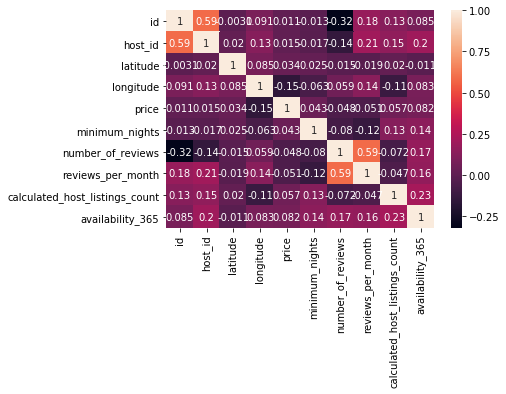

In [0]:
sns.heatmap(df.corr(),annot=True)

No pair of attribute have a strong correlation or make sense to have a correlation

##2) Neighbourhood group distribution


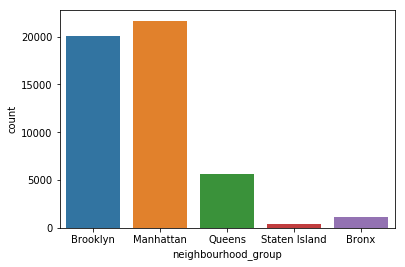

In [0]:
sns.countplot(x='neighbourhood_group',data = df)

Manhattan + Brookyn area are cover more than 80% of data

##3) Price Analysis

**Overall distribution**

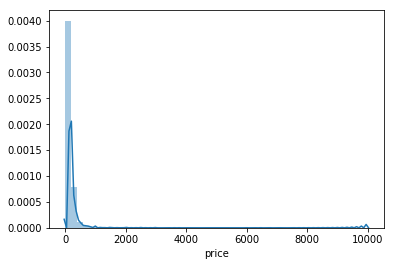

In [0]:
sns.distplot(df['price'])

Overall price distribution is very skewed (linear regression is not a good model for this dataset)

###By Area
Let see how price is distributed on each neighbourhood area

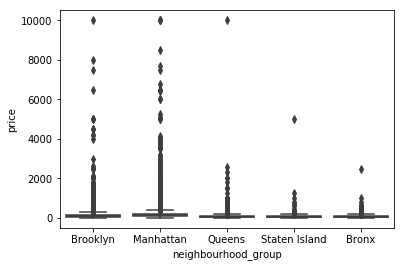

In [0]:
sns.boxplot(x='neighbourhood_group',y='price',data=df)

Look like we have so many outlier price data in each neighbourhood.<br>
From descriptive statistics from earlier cells let **try** price distribution for price under percentile 0.95



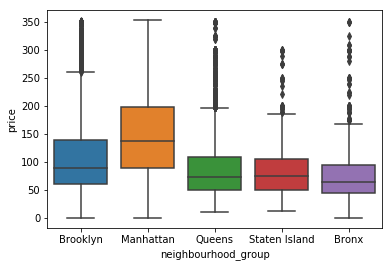

In [0]:
sns.boxplot(x='neighbourhood_group',y='price',data=df[df['price'] < df['price'].quantile(0.95)])

Better :D<br>
Now we see that in overall Manhattan area result the most expensive price compare with others

Let's see price distribution on geographical plotting separated by price quartile (Q1-Q4)

In [0]:
import geopandas

In [0]:
#create a function to indicate price segmentation
def price_segment(price):
  if price >= df['price'].quantile(0.75):
    return 'Q4'
  elif price >= df['price'].quantile(0.5):
    return 'Q3'
  elif price >= df['price'].quantile(0.25):
    return 'Q2'
  else :
    return 'Q1'

df['price_segment'] = df['price'].apply(lambda x : price_segment(x))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry,price_segment
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749),Q3
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98376999999999 40.75362),Q4
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,POINT (-73.9419 40.80902),Q3
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514),Q2
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851),Q2


(-74.28337047811618, -73.67222994890716, 40.4751445261289, 40.936503645041604)

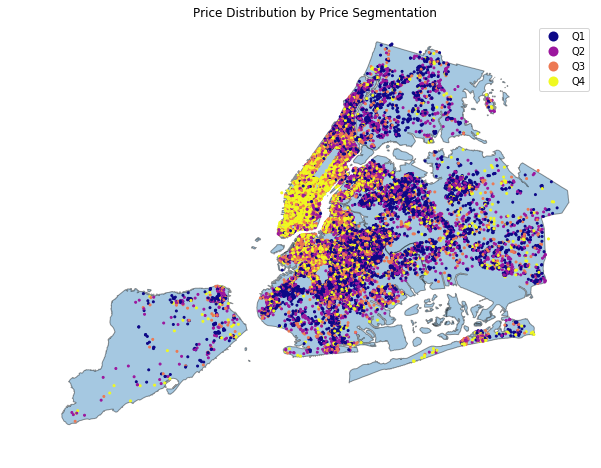

In [0]:
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)
geometry = geopandas.points_from_xy(df['longitude'], df['latitude'])
geo_data = geopandas.GeoDataFrame(df,geometry=geometry)
fig,ax = plt.subplots(figsize=(10,10))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column='price_segment',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Price Distribution by Price Segmentation")
plt.axis('off')

Apparently, the expensive price rooms located in Manhattan area

###By Room Type
Now let's see room type in each neighbourhood area

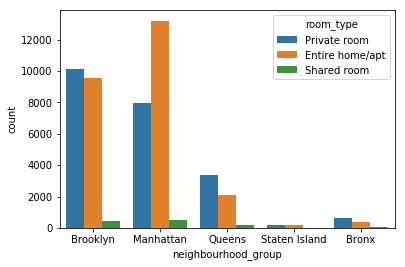

In [0]:
sns.countplot(x='neighbourhood_group', data = df, hue='room_type')

Private room and entire home/apt have a big share

Price (percentile 0-95) distibuted on each room type on different neighbourhood area

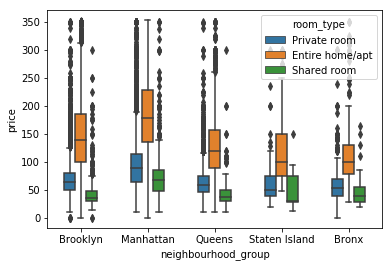

In [0]:
sns.boxplot(x='neighbourhood_group',y = 'price', data=df[df['price'] < df['price'].quantile(0.95)],hue='room_type',width = 0.5)

Entire home/apt have higher cost than others (of course :p)

###By Reviews

Overall price compare with number of reviews

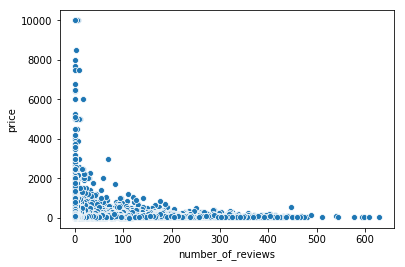

In [0]:
sns.scatterplot(x='number_of_reviews',y='price',data=df)
#df.describe()

Assume that higher number of review means higher number of room reservation <br>
From scatter plot we see that lower price tends to have higher room reservation (that's make sense)

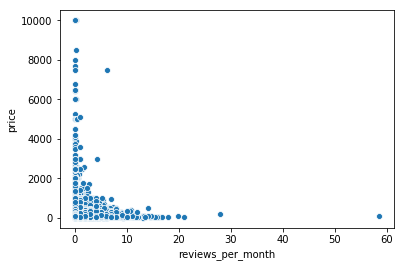

In [0]:
sns.scatterplot(x='reviews_per_month',y='price',data=df)

Lower price has more review per month because it has more room reservation (also make sense)